# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602
['margaret river', 'thompson', 'grytviken', 'mingshui', 'isafjordur', 'tiksi', 'longyearbyen', 'guerrero negro', 'tan-tan', 'danielskuil', 'uturoa', "st. john's", 'kamina', 'el jadid', 'garachico', 'waitangi', 'carnarvon', "ust'-ordynskiy", 'georgetown', 'dabwali', 'papatowai', 'taiohae', 'bethel', 'lethem', 'albany', 'merizo village', 'kani keli', 'uto', 'adamstown', 'olyokminsk', 'east london', 'edinburgh of the seven seas', 'belmonte', 'yellowknife', 'aykhal', 'bilibino', 'qaqortoq', 'el fasher', 'petropavlovsk-kamchatsky', 'puerto natales', 'yeed', 'port-aux-francais', 'katsuura', 'tierp', 'ust-nera', 'boa vista', 'keflavik', 'usinsk', 'kodiak', "hayma'", 'avarua', 'wallan', 'puerto ayora', 'jamestown', 'tolanaro', 'polyarnyy', 'grand baie', "verkhotur'ye", 'blackmans bay', 'brackley', 'ushuaia', 'iqaluit', 'westport', 'ribeira grande', 'cidreira', 'az zuwaytinah', 'camocim', 'new norfolk', 'pangkalan brandan', 'alice springs', 'kralendijk', 'show 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.datetime.fromtimestamp(city_weather['dt'])
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | mingshui
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | tan-tan
Processing Record 10 of Set 1 | danielskuil
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | st. john's
Processing Record 13 of Set 1 | kamina
Processing Record 14 of Set 1 | el jadid
Processing Record 15 of Set 1 | garachico
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | ust'-ordynskiy
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | dabwali
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | taiohae
City not found. Skippi

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,54.18,65,80,12.88,AU,2023-10-29 15:23:06
1,thompson,55.7435,-97.8558,26.76,63,75,11.50,CA,2023-10-29 15:23:07
2,grytviken,-54.2811,-36.5092,41.67,95,100,7.18,GS,2023-10-29 15:23:07
3,mingshui,36.7167,117.5000,63.28,47,55,10.83,CN,2023-10-29 15:23:07
4,isafjordur,66.0755,-23.1240,34.02,80,36,3.40,IS,2023-10-29 15:23:08


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,54.18,65,80,12.88,AU,2023-10-29 15:23:06
1,thompson,55.7435,-97.8558,26.76,63,75,11.50,CA,2023-10-29 15:23:07
2,grytviken,-54.2811,-36.5092,41.67,95,100,7.18,GS,2023-10-29 15:23:07
3,mingshui,36.7167,117.5000,63.28,47,55,10.83,CN,2023-10-29 15:23:07
4,isafjordur,66.0755,-23.1240,34.02,80,36,3.40,IS,2023-10-29 15:23:08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

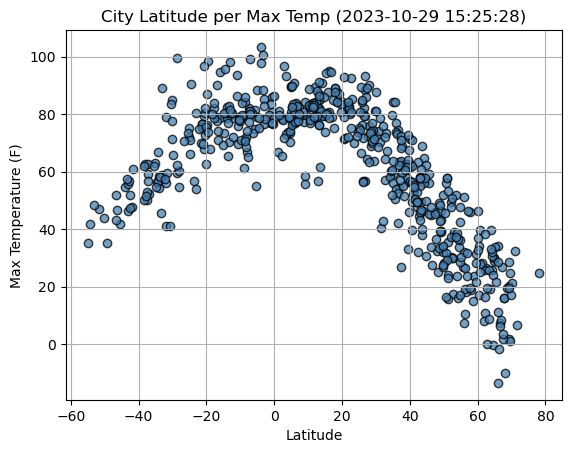

In [56]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')

# Incorporate the other graph properties
plt.grid()
plt.title(f'City Latitude per Max Temp ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

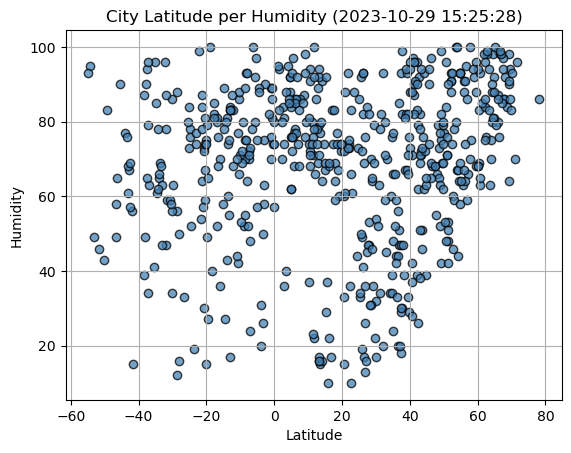

In [55]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')

# Incorporate the other graph properties
plt.grid()
plt.title(f'City Latitude per Humidity ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

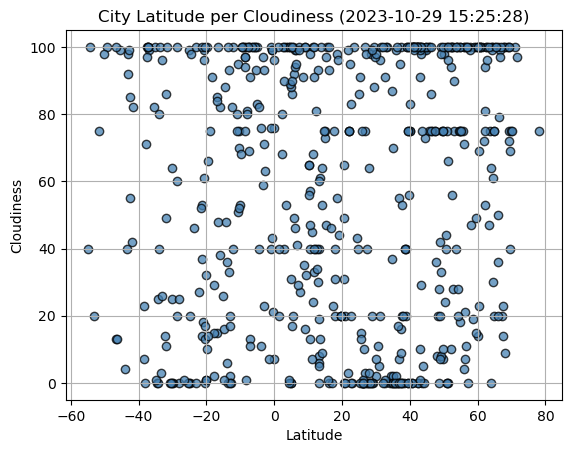

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')

# Incorporate the other graph properties
plt.grid()
plt.title(f'City Latitude per Cloudiness ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

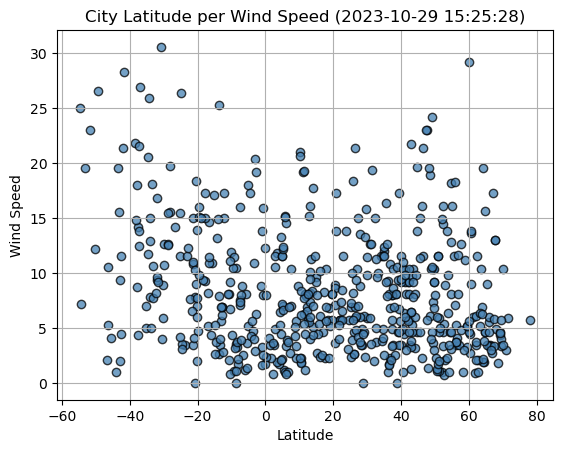

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')

# Incorporate the other graph properties
plt.grid()
plt.title(f'City Latitude per Wind Speed ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


Text(0, 0.5, 'Max Temperature (F)')

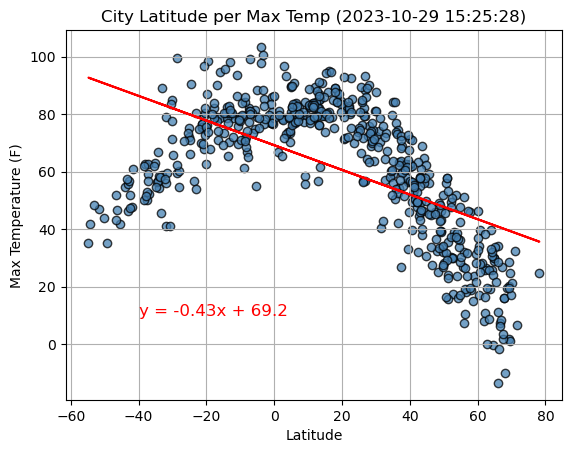

In [59]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_temp_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,lat_temp_regress_values,"r-")
plt.annotate(line_eq,(-40,10), fontsize=12, color='red')
plt.grid()
plt.title(f'City Latitude per Max Temp ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

Text(0, 0.5, 'Humidity')

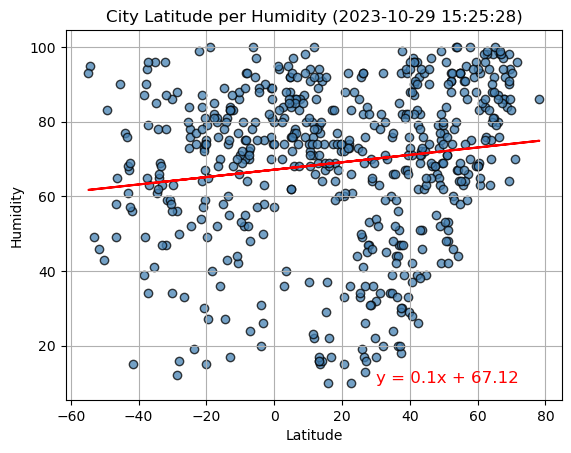

In [61]:
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_humidity_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,lat_humidity_regress_values,"r-")
plt.annotate(line_eq,(30,10), fontsize=12, color='red')
plt.grid()
plt.title(f'City Latitude per Humidity ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

Text(0, 0.5, 'Cloudiness')

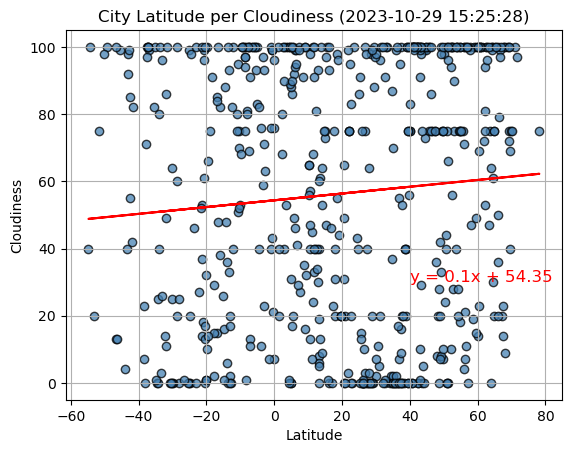

In [62]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_cloudy_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,lat_cloudy_regress_values,"r-")
plt.annotate(line_eq, (40,30), fontsize=12, color='red')
plt.grid()
plt.title(f'City Latitude per Cloudiness ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

Text(0, 0.5, 'Wind Speed')

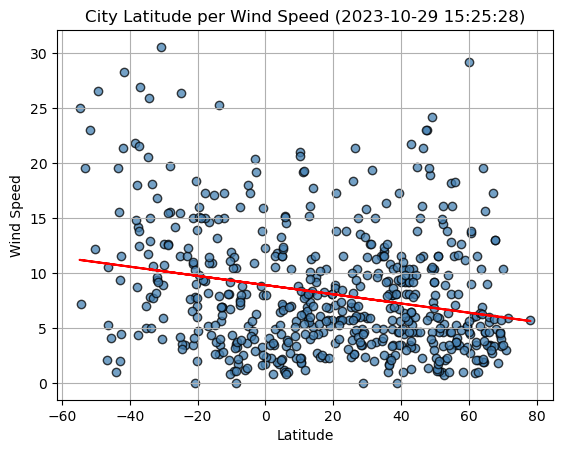

In [63]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_wind_regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,lat_wind_regress_values,"r-")
plt.annotate(line_eq,(20,40), fontsize=12, color='red')
plt.grid()
plt.title(f'City Latitude per Wind Speed ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,26.76,63,75,11.50,CA,2023-10-29 15:23:07
3,mingshui,36.7167,117.5000,63.28,47,55,10.83,CN,2023-10-29 15:23:07
4,isafjordur,66.0755,-23.1240,34.02,80,36,3.40,IS,2023-10-29 15:23:08
5,tiksi,71.6872,128.8694,6.69,96,97,5.93,RU,2023-10-29 15:23:08
6,longyearbyen,78.2186,15.6401,24.64,86,75,5.75,SJ,2023-10-29 15:21:34


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,54.18,65,80,12.88,AU,2023-10-29 15:23:06
2,grytviken,-54.2811,-36.5092,41.67,95,100,7.18,GS,2023-10-29 15:23:07
9,danielskuil,-28.1887,23.5395,54.54,16,0,19.73,ZA,2023-10-29 15:23:09
10,uturoa,-16.7333,-151.4333,78.89,80,15,14.67,PF,2023-10-29 15:23:09
12,kamina,-8.7386,24.9906,71.40,75,97,3.51,CD,2023-10-29 15:23:09


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Max Temp')

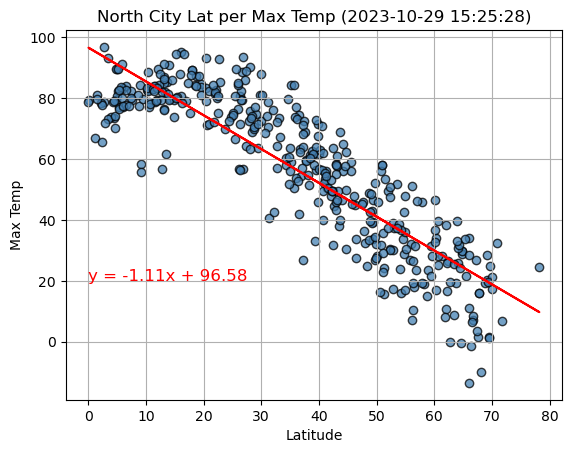

In [66]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20), fontsize=12, color='red')
plt.grid()
plt.title(f'North City Lat per Max Temp ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

Text(0, 0.5, 'Max Temp')

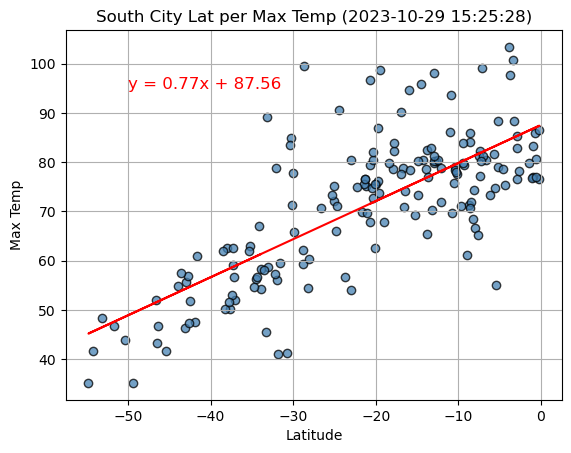

In [67]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,95), fontsize=12, color='red')
plt.grid()
plt.title(f'South City Lat per Max Temp ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

**Discussion about the linear relationship:** 

As you might expect, plotting a linear regression shows us that there is a strong correlation between distance from the equator (Latitude) and the temperature. As you can see from both plots, the weather becomes much warner as Latitude approaches 0 (Equator). With this example, both the Northern and Southern hemispheres have very strong correlations between Max Temp and Latitude (the slope at the time of the data retrieval was -1.11 and 0.77 respectively).

It is interesting to note, the temperatures in the Northern Hemisphere appear to be lower overall with the majority of the datapoints existing within the 0 - 80 degree range. The Southern Hemisphere datapoints, on the other hand, primarily exist between 40 and 100 degrees. However, there are more Northern Hemisphere datapoints, many of which exist further away from the equator, than the majority of their counterparts in the Sourthern Hemisphere, which may account for this difference.

### Humidity vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Humidity')

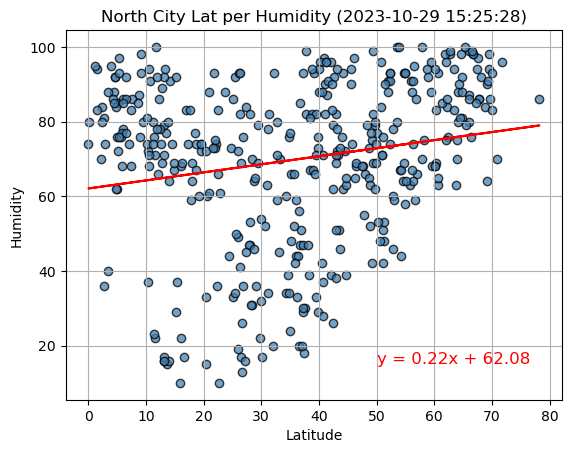

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15), fontsize=12, color='red')
plt.grid()
plt.title(f'North City Lat per Humidity ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

Text(0, 0.5, 'Humidity')

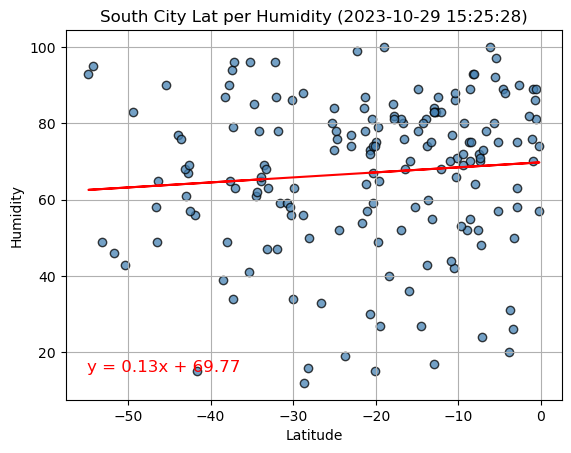

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15), fontsize=12, color='red')
plt.grid()
plt.title(f'South City Lat per Humidity ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** 

By looking at the plots comparing Latitude to Humidity, we can state with some certainty that the correlation between the two is quite weak. The datapoints span the majority of the plot and the slopes are only 0.22 and 0.13 for the Northern Hemispher and Southern Hemisphere respectively (at the time of this data import).

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Cloudiness')

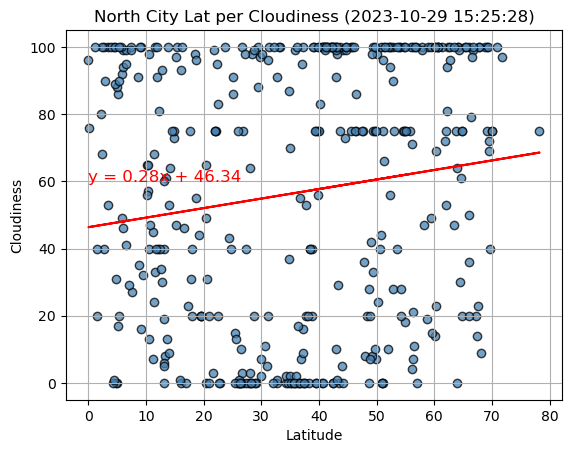

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,60), fontsize=12, color='red')
plt.grid()
plt.title(f'North City Lat per Cloudiness ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

Text(0, 0.5, 'Cloudiness')

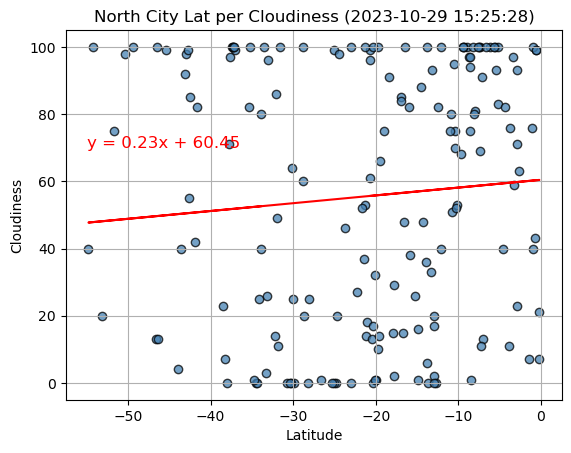

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70), fontsize=12, color='red')
plt.grid()
plt.title(f'North City Lat per Cloudiness ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** 

By looking at the plots comparing Latitude to Cloudiness, we can determine that the correlation between the two is quite weak. The datapoints span the majority of the plot and the slopes are only 0.28 and 0.23 for the Northern Hemispher and Southern Hemisphere respectively (at the time of this data import).

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Wind Speed')

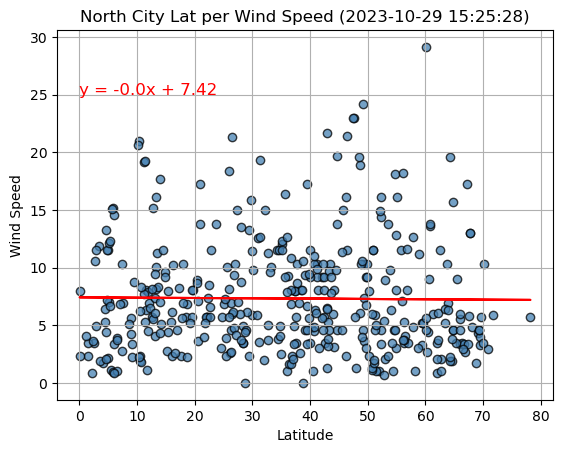

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25), fontsize=12, color='red')
plt.grid()
plt.title(f'North City Lat per Wind Speed ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

In [81]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,54.18,65,80,12.88,AU,2023-10-29 15:23:06
1,thompson,55.7435,-97.8558,26.76,63,75,11.50,CA,2023-10-29 15:23:07
2,grytviken,-54.2811,-36.5092,41.67,95,100,7.18,GS,2023-10-29 15:23:07
3,mingshui,36.7167,117.5000,63.28,47,55,10.83,CN,2023-10-29 15:23:07
4,isafjordur,66.0755,-23.1240,34.02,80,36,3.40,IS,2023-10-29 15:23:08
5,tiksi,71.6872,128.8694,6.69,96,97,5.93,RU,2023-10-29 15:23:08
6,longyearbyen,78.2186,15.6401,24.64,86,75,5.75,SJ,2023-10-29 15:21:34
7,guerrero negro,27.9769,-114.0611,75.87,47,0,8.77,MX,2023-10-29 15:23:08
8,tan-tan,28.4380,-11.1032,68.76,70,98,4.90,MA,2023-10-29 15:23:08


Text(0, 0.5, 'Wind Speed')

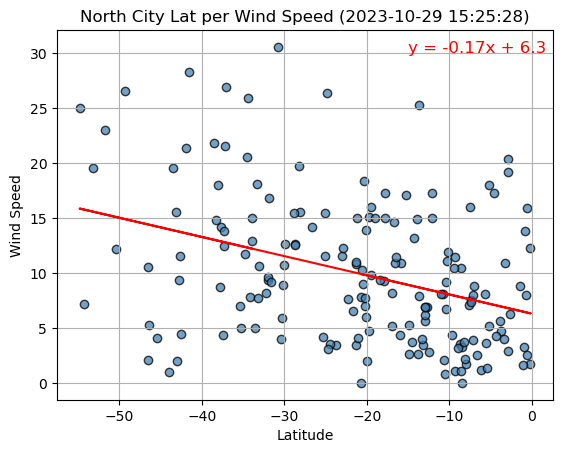

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue',edgecolors='black', alpha=0.75, label='Cities')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,30), fontsize=12, color='red')
plt.grid()
plt.title(f'North City Lat per Wind Speed ({city_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** 

By looking at the plots comparing Latitude to Cloudiness, we can determine that the correlation between the two is quite weak. The datapoints span the majority of the plot and the slopes are only -0.0 and -0.17 for the Northern Hemispher and Southern Hemisphere respectively (at the time of this data import).